# Customizando o tema de fundo dos gráficos

Esse notebook é o que entendi do seguinte link: https://matplotlib.org/stable/tutorials/introductory/customizing.html. 

Para mudar o tema de fundo do gráfico, usamos a função ```style```. A lista dos fundos disponíveis pode ser vista fazendo ```style.available```.

In [30]:
from matplotlib.pyplot import style

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Para usar um estilo específico, é só usar a função ```style.use``` e colocar no argumento o modelo escolhido.

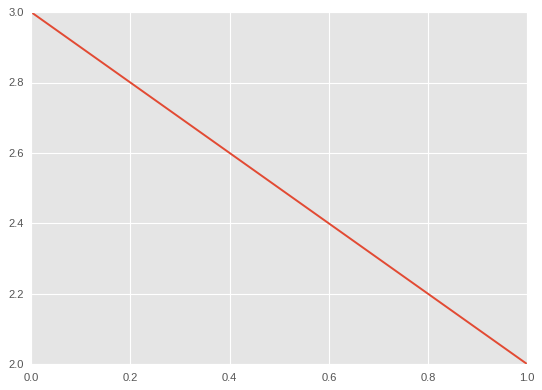

In [40]:
from pylab import plot, show

x = [1,0]
y = [2,3]

style.use('ggplot')

plot(x,y)
show()